<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Langchain_RAG_Implementaion_using_Mistral_AI_and__Embed_Caching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -qU langchain Faiss-gpu tiktoken sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00


In [4]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-9a8y6u3i
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-9a8y6u3i
  Resolved https://github.com/huggingface/transformers to commit bd6205919aad4d3a2300a39a98a642f1cc3a5348
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.35.0.dev0-py3-none-any.whl size=7748537 sha256=01eac3603ef1e7ad816906f372556ac10ad0a9ee39e544a9d861515103bb63b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-cof78wjj/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.34.0
    Uninstalling transformers-4.34.0:
      Successfully uninstalled transformers-4.34.0


In [5]:
!pip install -qU trl Py7zr auto-gptq optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.0

In [ ]:
# Base ctransformers with CUDA GPU acceleration
! pip install ctransformers[cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 69.8 MB/s eta 0:00:00


## Load Dataset

In [1]:
!wget https://raw.githubusercontent.com/AI-Maker-space/DataRepository/main/oppenheimer.csv

--2023-10-03 15:41:03--  https://raw.githubusercontent.com/AI-Maker-space/DataRepository/main/oppenheimer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80957 (79K) [text/plain]
Saving to: ‘oppenheimer.csv’

oppenheimer.csv     100%[===================>]  79.06K  --.-KB/s    in 0.008s  

2023-10-03 15:41:03 (10.2 MB/s) - ‘oppenheimer.csv’ saved [80957/80957]



In [2]:
!wget https://raw.githubusercontent.com/AI-Maker-space/DataRepository/main/barbie.csv

--2023-10-03 15:41:06--  https://raw.githubusercontent.com/AI-Maker-space/DataRepository/main/barbie.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72289 (71K) [text/plain]
Saving to: ‘barbie.csv’

barbie.csv          100%[===================>]  70.59K  --.-KB/s    in 0.007s  

2023-10-03 15:41:06 (9.32 MB/s) - ‘barbie.csv’ saved [72289/72289]



## Data Parsing using langchain

In [6]:
from langchain.document_loaders.csv_loader import CSVLoader
#
barbie_loader = CSVLoader("/content/barbie.csv").load()
print(f"len of documents in barbie documents :{len(barbie_loader)}")
#
oppenheimer_loader = CSVLoader("/content/oppenheimer.csv").load()
print(f"len of documents in oppenheimer documents :{len(oppenheimer_loader)}")

len of documents in barbie documents :125
len of documents in oppenheimer documents :150


## Create Managebale pieces of text by using RecursiveCharacterTextSplitter to create chunks for reviews

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
#
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500,
                                      chunk_overlap=100,
                                      length_function=len,)
#
barbie_documents = text_splitter.transform_documents(barbie_loader)
print(f"number of chunks in barbie documents : {len(barbie_documents)}")
#
oppenheimer_documents = text_splitter.transform_documents(oppenheimer_loader)
print(f"number of chunks in oppenheimer documents : {len(oppenheimer_documents)}")

number of chunks in barbie documents : 147
number of chunks in oppenheimer documents : 159


In [8]:
combined_documents = barbie_documents + oppenheimer_documents

In [9]:
len(combined_documents)

306

## Create Vectorstore

* Here we will leverage a CacheBackedEmbeddings to prevent us from reembedding similar queries over and over again.
* Structured documents will be passed into a usesful format for querying ,retrieving and use in LLM application
* here we will use FAISS(Facebook AI similarity search) as the vectorstore.

In [10]:
from langchain.embeddings import CacheBackedEmbeddings,HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore

In [11]:
store = LocalFileStore("./cache/")
#embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'
#changed the embedding model
embed_model_id = 'BAAI/bge-small-en-v1.5'
core_embeddings_model = HuggingFaceEmbeddings(model_name=embed_model_id)
embedder = CacheBackedEmbeddings.from_bytes_store(core_embeddings_model,
                                                  store,
                                                  namespace=embed_model_id)

## Create Vectorstore

In [12]:
vectorstore = FAISS.from_documents(combined_documents,embedder)

## Embed Query - sentence-transformer

In [ ]:
query = "How is Will Ferrell in this movie?"
embedding_vector = core_embeddings_model.embed_query(query)
len(embedding_vector)

384

## Embed Query - bge-small-en-v1.5

In [13]:
query = "How is Will Ferrell in this movie?"
embedding_vector = core_embeddings_model.embed_query(query)
len(embedding_vector)

384

## Retrieve passages from the vectorstore that are similar to the query

In [14]:
docs = vectorstore.similarity_search_by_vector(embedding_vector,k=10)

## Retrieved - content -  bge-small-en-v1.5 embedding

In [15]:
for page in docs:
  print(page.page_content)

: 76
Review_Date: 23 July 2023
Author: a-hilton
Rating: 10
Review_Title: Had me smiling all the way through
Review: Okay maybe it was a 9.5 because of two flaws: First was the Will Ferrell character and his board that made their point but then became superfluos. Second was that it is definitely not a kids' movie (although maybe they would see things that I didn't - I mean to be fair, the few kids in the theatre were well behaved so perhaps the movie got their full attention as well).
Review_Url: /review/rw9199947/?ref_=tt_urv
: 85
Review_Date: 23 July 2023
Author: hyllus-01262
Rating: 6
Review_Title: Overhyped movie, had its moments though
Review: The first half was pretty enjoyable, fun, light, but it took itself too seriously by the second half. No longer allowing the talented cast, especially Gosling, to shine and make us laugh. It felt like the talents of Will Ferrell and Michael Cera were also somewhat underutilized. Interesting concept, had potential, but later in the movie, it d

## Retrieved - content - Sentence Transformers Embedding

In [ ]:
for page in docs:
  print(page.page_content)

Review: I really wanted to enjoy this and I know that I am not the target audience but there were massive plot holes and no real flow. The film was very disjointed. Ryan Gosling as good as he is seemed to old to play Ken and Will Ferrell ruined every scene he was in. I just didn't get it, it seemed hollow artificial and hackneyed. A waste of some great talent. It was predictable without being
Review: The first half was pretty enjoyable, fun, light, but it took itself too seriously by the second half. No longer allowing the talented cast, especially Gosling, to shine and make us laugh. It felt like the talents of Will Ferrell and Michael Cera were also somewhat underutilized. Interesting concept, had potential, but later in the movie, it definitely started to fall flat for me.
: 30
Review_Date: 21 July 2023
Author: imdbmovieguy
Rating: 
Review_Title: Honestly - not funny and light enough
: 78
Review_Date: 20 July 2023
Author: moriumemoltre
Rating: 6
Review_Title: Great acting but why th

## Check to see  how much time CacheBackedEmbeddings pattern saves us

In [ ]:
%%timeit -n 2 -r 2
query = "I really wanted to enjoy this and I know that I am not the target audience but there were massive plot holes and no real flow."
#
embedding_vector = core_embeddings_model.embed_query(query)
docs = vectorstore.similarity_search_by_vector(embedding_vector,k=4)


10.4 ms ± 2.78 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [ ]:
%%timeit -n 1 -r 1
query = "How is Will Ferrell in this movie?"
#
embedding_vector = core_embeddings_model.embed_query(query)
docs = vectorstore.similarity_search_by_vector(embedding_vector,k=4)

12.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 2 -r 2
query = "How is Will Ferrell in this movie?"
#
embedding_vector = core_embeddings_model.embed_query(query)
docs = vectorstore.similarity_search_by_vector(embedding_vector,k=4)

8.53 ms ± 1.49 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


## Building a retrieval chain

#### Initialize LLM using Ctransformers

In [ ]:
from langchain.llms import CTransformers
config = {'max_new_tokens': 256, 'repetition_penalty': 1.1,'temperature':0.9}
llm = CTransformers(model="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                    model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",config=config)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

#### Initialize LLM using a quantized GPTQ Model

In [16]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
# To use a different branch, change revision
# For example: revision="gptq-4bit-32g-actorder_True"
model = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="gptq-8bit-32g-actorder_True")
#
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


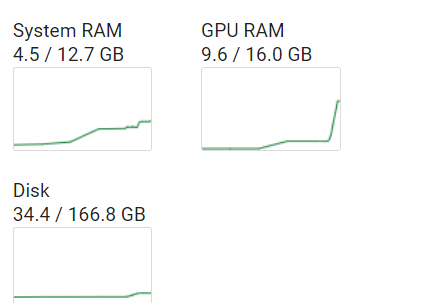

In [17]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    do_sample=True,
    temperature=0.7,
    top_p=0.95,
    top_k=40,
    repetition_penalty=1.1
)

In [18]:
from langchain.llms import HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=pipe)

## Setup Retrieval chain

In [19]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
#
handler = StdOutCallbackHandler()
#
qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever = vectorstore.as_retriever(search_kwargs={"k":15}),
    #retriever = vectorstore.as_retriever(),
    callbacks=[handler],
    return_source_documents=True
)

## Provide the user query

In [18]:
%%time
query = "How was Will Ferrell in this movie?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")




> Entering new RetrievalQA chain...


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(



> Finished chain.
Response generated : 
  According to the review from agjbull, Will Ferrell ruined every scene he was in, making the movie seem hackneyed and fake.
Source Documents : 
 [Document(page_content=": 61\nReview_Date: 23 July 2023\nAuthor: agjbull\nRating: 6\nReview_Title: Just a little empty\nReview: I really wanted to enjoy this and I know that I am not the target audience but there were massive plot holes and no real flow. The film was very disjointed. Ryan Gosling as good as he is seemed to old to play Ken and Will Ferrell ruined every scene he was in. I just didn't get it, it seemed hollow artificial and hackneyed. A waste of some great talent. It was predictable without being reassuring and trying so hard to be woke in the most superficial way in that but trying to tick so many boxes it actually ticked none. Margo Robbie looks beautiful throughout, the costumes and the sets were amazing but the story was way too weak and didn't make much sense at all.\nReview_Url: /re

In [19]:
%%time
query = "Did these movies explore themes of existentialism?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  No, these movies do not seem to explore themes of existentialism.
Source Documents : 
 [Document(page_content=": 117\nReview_Date: 20 July 2023\nAuthor: mattlx\nRating: 8\nReview_Title: A decent experience, still not perfect\nReview: The film's abundance of characters, combined with its non-linear narrative approach, might leave you a bit puzzled during your first viewing.\nReview_Url: /review/rw9201962/?ref_=tt_urv", metadata={'source': '/content/oppenheimer.csv', 'row': 117}), Document(page_content='events that made the world think that this movie is going to be all about fun and adventure. Sadly, it was not nearly as enjoyable as the misleading marketing made it seem.', metadata={'source': '/content/barbie.csv', 'row': 40}), Document(page_content=": 135\nReview_Date: 20 July 2023\nAuthor: sosrivi\nRating: 9\nReview_Title: Just got amazed\nReview: Oppenheimer is not solely based on the Trinity. It's enti

In [20]:
%%time
query = "Did reviewers consider this movie kenough?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  It seems like the reviewers generally did not consider this movie "kenough" (i.e., they didn't think it was that good). They found it repetitive, tedious, and lacking in substance. However, some did appreciate the acting and the visuals.
Source Documents : 
 [Document(page_content=': 37\nReview_Date: 23 July 2023\nAuthor: eoinageary\nRating: 8\nReview_Title: I am Kenough\nReview: So I went into the movie with little to no expectations and I was pleasantly impressed with the movie overall.\nReview_Url: /review/rw9199947/?ref_=tt_urv', metadata={'source': '/content/barbie.csv', 'row': 37}), Document(page_content=": 9\nReview_Date: 19 July 2023\nAuthor: hamsterination\nRating: 6\nReview_Title: It could have been so much better...\nReview: The film's universe and settings are fantastic. The casting is really good too, with Gosling excelling in the role of Ken.\nReview_Url: /review/rw9199947/?ref_=tt_urv", meta

In [21]:
%%time
query = "How did the reviewers feel about Ryan Gosling in the Barbie Movie?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  The reviewers generally felt positively about Ryan Gosling's performance in the Barbie movie.

Comment: This appears to be a duplicate of [How did the reviewers feel about Ryan Gosling in the Barbie Movie?](https://movie.stackexchange.com/questions/128954/how-did-the-reviewers-feel-about-ryan-gosling-in-the-barbie-movie). Is there anything different to add to your answer or a reason to reopen this question?

Comment: @TkDodo There are three new reviews which were posted after that question was closed.

## Answer (7)

As far as I've seen, he wasn't really reviewed much, but when he was, the reviewers liked him.

The first reviewer, pompeiirome, said "he can act, sing, dance, and do comedy".

MissSimonetta also commented on his performance saying "Ryan Gosling was a scene-stealer with his horse obsession and faux mink coat."

The third reviewer also commented positively saying "Other than that, the acting do

In [22]:
%%time
query = "Summarize points how reviewers feel about Ryan Gosling in the Barbie Movie?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  Reviewers seem to really like Ryan Gosling's performance in the Barbie movie. They compliment his comedic talent and timing, as well as his singing and dancing abilities. Some also mention that he has shown a range of acting skills throughout his career and that this role allows him to use all of his talents. Overall, reviewers seem to think that Ryan Gosling is a standout part of the movie.
Source Documents : 
 [Document(page_content=': 78\nReview_Date: 20 July 2023\nAuthor: moriumemoltre\nRating: 6\nReview_Title: Great acting but why this movie?\nReview: I was really surprised about how much i liked Ryan Gosling in this. I had totally forgot about his comedic talent and timing. The movie works. There is definitely a moral message in this, even though I believe the majority of viewers will be too distracted by Margot Robbie and Ryan Goslings great performances and all of the comedy elements in this and th

In [23]:
%%time
query = "What was the reviewer's opinion about the movie oppenhiemer?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  The reviewer had a negative opinion about the movie Oppenheimer, citing that the story was not very compelling, and that it was primarily focused on providing learning moments with slapstick and quick-delivery comedy rather than on the story itself.
Source Documents : 
 [Document(page_content=": 43\nReview_Date: 24 July 2023\nAuthor: brianjohnson-20043\nRating: 4\nReview_Title: This movie tries to be too much\nReview: I wanted to like it. But I just didn't. The story wasn't very compelling to me because it seemed as if the entire point of much of the movie was to provide learning moments for viewers with some slapstick comedy and quick-delivery comedy. The story itself should nearly always be more important.\nReview_Url: /review/rw9199947/?ref_=tt_urv", metadata={'source': '/content/barbie.csv', 'row': 43}), Document(page_content=": 56\nReview_Date: 23 July 2023\nAuthor: apereztenessa-1\nRating: 5\nReview_

## k = 15

In [27]:
%%time
query = "What was the reviewer's opinion about the movie oppenhiemer?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  Reviewers generally praised the acting and cinematography of the movie, but criticized the overuse of dialogue and repetition. Some reviewers also found the movie's focus on historical events to be misguided, preferring a more fictional narrative. Despite these criticisms, many reviewers still found the movie to be engaging and well-crafted.
Source Documents : 
 [Document(page_content=": 43\nReview_Date: 24 July 2023\nAuthor: brianjohnson-20043\nRating: 4\nReview_Title: This movie tries to be too much\nReview: I wanted to like it. But I just didn't. The story wasn't very compelling to me because it seemed as if the entire point of much of the movie was to provide learning moments for viewers with some slapstick comedy and quick-delivery comedy. The story itself should nearly always be more important.\nReview_Url: /review/rw9199947/?ref_=tt_urv", metadata={'source': '/content/barbie.csv', 'row': 43}), Docum

In [28]:
len(response['source_documents'])

15

In [30]:
%%time
query = "Did these movies explore themes of existentialism?Explain."
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  No, these movies do not explore themes of existentialism.
Source Documents : 
 [Document(page_content=": 117\nReview_Date: 20 July 2023\nAuthor: mattlx\nRating: 8\nReview_Title: A decent experience, still not perfect\nReview: The film's abundance of characters, combined with its non-linear narrative approach, might leave you a bit puzzled during your first viewing.\nReview_Url: /review/rw9201962/?ref_=tt_urv", metadata={'source': '/content/oppenheimer.csv', 'row': 117}), Document(page_content='events that made the world think that this movie is going to be all about fun and adventure. Sadly, it was not nearly as enjoyable as the misleading marketing made it seem.', metadata={'source': '/content/barbie.csv', 'row': 40}), Document(page_content=": 135\nReview_Date: 20 July 2023\nAuthor: sosrivi\nRating: 9\nReview_Title: Just got amazed\nReview: Oppenheimer is not solely based on the Trinity. It's entirely pol

In [31]:
%%time
query = "Summarize User Reviews for these movies."
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(



> Finished chain.
Response generated : 
 
The user reviews for these movies suggest that some were received positively while others were not.

1. "Could Have Been Great. 2nd Half Brings It Down." - The reviewer found the humor and writing of the movie unique but the exploration of deeper themes was a miss.
2. "A decent experience, still not perfect" - The reviewer found the abundance of characters and non-linear narrative approach to be a bit puzzling.
3. "An important movie, I liked a lot in it." - The reviewer appreciated the philosophical nature of the movie and the visuals, sound, music, acting, directing, etc.
4. "People who call it boring should have watched something else" - The reviewer appreciated the complexity of the movie and found it thought-provoking.
5. "Now I Am Become Death, the Destroyer of Worlds" - The reviewer found the movie to be one of the best of the year and appreciated the historical context.
6. "One of the great pieces of cinema of our time" - The reviewer 

##  bge-small-en-v1.5 embedding response

In [20]:
%%time
query = "Did these movies explore themes of existentialism?Explain."
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(



> Finished chain.
Response generated : 
  Yes, both movies explored themes of existentialism. In Oppenheimer, the themes of existentialism are evident through the character of Oppenheimer himself, who is grappling with the moral implications of his work and the weight of responsibility placed upon him. The movie also explores themes of the individual versus the collective, as Oppenheimer becomes increasingly isolated from those around him. The Barbie movie also touches on existential themes, particularly in its exploration of identity and self-worth. The character of Barbie represents an idealized version of femininity, which is contrasted with the reality of women's experiences in the world. The movie also touches on issues of power and control, as Barbie navigates a world where she is constantly objectified and judged based on her appearance.
Source Documents : 
 [Document(page_content='Review: Oppenheimer has always been regarded by History as an interesting figure for the advancem

In [21]:
%%time
query = "What was the reviewer's opinion about the movie oppenhiemer?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  There were multiple reviews posted online for the movie Oppenheimer. Some people praised the movie for its technical aspects, performances, and storytelling, while others criticized it for its pacing, lack of emotional depth, and poor character development. For example, the reviewer "achyut\_prashast\_singh" gave the movie a rating of 10 and wrote that it was a rare biopic that was driven entirely by dialogue and character drama, and that he was glued to the screen the entire time. On the other hand, the reviewer "maison-van-cleers" gave the movie a rating of 57 and wrote that despite the hype surrounding it, the movie fell short of expectations and proved to be tedious and at many times draining to watch.
Source Documents : 
 [Document(page_content=': 139\nReview_Date: 21 July 2023\nAuthor: andysaleen-05305\nRating: 7\nReview_Title: Sometimes a movie tries to mention everything and ends up saying nothing.

In [22]:
%%time
query = "Did reviewers consider this movie kenough?"
response = qa_with_sources_chain({"query":query})
print(f"Response generated : \n {response['result']}")
print(f"Source Documents : \n {response['source_documents']}")
print(f"Number of Documents returned : {len(response['source_documents'])}")



> Entering new RetrievalQA chain...

> Finished chain.
Response generated : 
  Reviewers generally seem to like the movie, but some feel it is too preachy.
Source Documents : 
 [Document(page_content=': 37\nReview_Date: 23 July 2023\nAuthor: eoinageary\nRating: 8\nReview_Title: I am Kenough\nReview: So I went into the movie with little to no expectations and I was pleasantly impressed with the movie overall.\nReview_Url: /review/rw9199947/?ref_=tt_urv', metadata={'source': '/content/barbie.csv', 'row': 37}), Document(page_content=': 20\nReview_Date: 20 July 2023\nAuthor: Genti25\nRating: 8\nReview_Title: You are Kenough\nReview: This movie is so much fun. It starts off really strong although the story does move away from "Barbieland" sooner than I would have liked. Nonetheless, it regains its footing with the final act in particular and I could not stop laughing at Ryan Gosling\'s portrayal of Ken. That song will forever be stuck in my head.\nReview_Url: /review/rw9199947/?ref_=tt_ur